# Tutorial 2: NaiveBayes

<p> Date: 04/04/2024 <br>
Hours: 2 

Aim: Implementing Naive Bayes classifier. Make own case of Naive Bayes by using some exoplanet data.

__Work progression:__ 

* I followed the 05.05 Naive Bayes examples

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being useful as a quick-and-dirty baseline for a classification problem.

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-whitegrid')
from sklearn.model_selection import train_test_split

/var/folders/x8/tt4g51ms52n_rxzkb66gyznh0000gn/T/ipykernel_2962/4084046338.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Gaussian Naive Bayes

With this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.

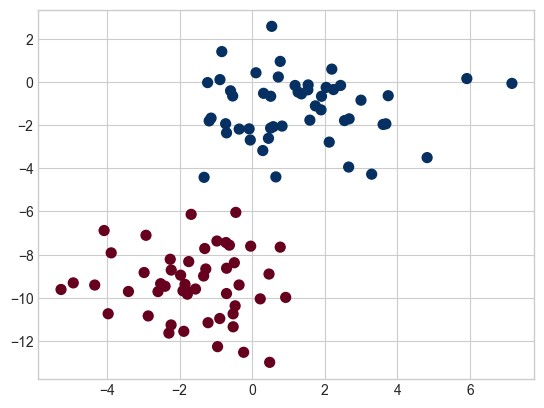

In [38]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [40]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

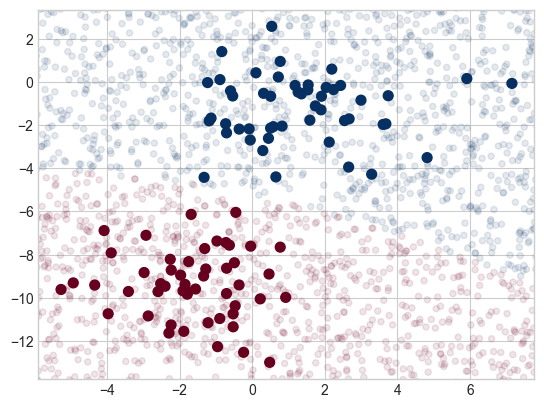

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [42]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Multinomial Naive Bayes

In [43]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [44]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [45]:
print(train.data[5][48:])

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [47]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

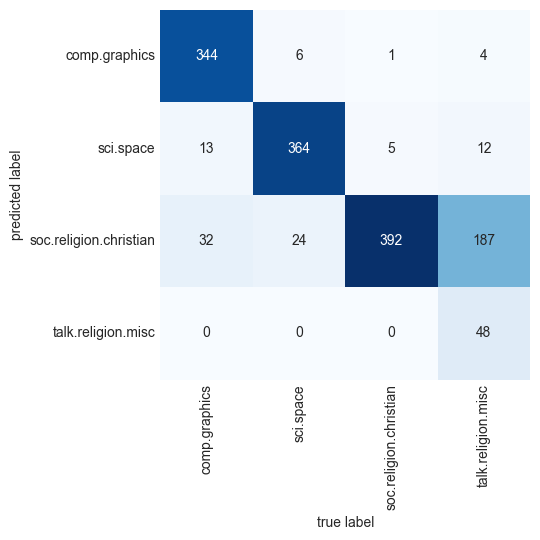

In [48]:
from sklearn.metrics import confusion_matrix

#A confusion matrix represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class. It helps in understanding the classes that are being confused by model as other class.
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [49]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [50]:
predict_category('sending a payload to the ISS')

'sci.space'

In [51]:
predict_category('discussing the existence of God')

'soc.religion.christian'

In [52]:
predict_category('determining the screen resolution')

'comp.graphics'

## Innovation

make own case of Naive Bayes by using some exoplanet data

I downloaded data from the NASA exoplanet archive. Some planets were detected by direct imaging or by transit. I clasified the planets by their detection method with naive bayes. I used the planetary system data

In [54]:
# importing data
complete = pd.read_csv('/Users/tharacaba/Desktop/Astrobiology/Naive Bayes/PS_2024.04.18_07.08.38.csv', sep=',', comment='#')
complete

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35916,ups And d,ups And,0,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2014-08-21,2004-01,2014-08-21
35917,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10
35918,xi Aql b,xi Aql,0,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837,2014-07-23,2011-08,2014-07-23
35919,xi Aql b,xi Aql,0,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837,2014-05-14,2008-06,2014-05-14


In [55]:
#Cleaning the data
complete_clean = complete[['pl_name', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 
               'pl_orbper', 'pl_orbsmax', 'pl_radj', 'pl_bmassj', 'pl_orbeccen', 'pl_eqt', 
               'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_logg', 
               'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag']]
complete_clean

,pl_name,default_flag,sy_snum,sy_pnum,discoverymethod,pl_orbper,pl_orbsmax,pl_radj,pl_bmassj,pl_orbeccen,...,st_spectype,st_teff,st_rad,st_mass,st_met,st_logg,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,11 Com b,0,2,1,Radial Velocity,NaN,1.210,NaN,17.100,NaN,...,NaN,NaN,NaN,2.60,NaN,NaN,93.1846,4.72307,2.282,4.44038
1,11 Com b,0,2,1,Radial Velocity,326.03000,1.290,NaN,19.400,0.231,...,G8 III,4742.0,19.00,2.70,-0.350,2.31,93.1846,4.72307,2.282,4.44038
2,11 Com b,1,2,1,Radial Velocity,323.21000,1.178,NaN,15.464,0.238,...,G8 III,4874.0,13.76,2.09,-0.260,2.45,93.1846,4.72307,2.282,4.44038
3,11 UMi b,1,1,1,Radial Velocity,516.21997,1.530,NaN,14.740,0.080,...,NaN,4213.0,29.79,2.78,-0.020,1.93,125.3210,5.01300,1.939,4.56216
4,11 UMi b,0,1,1,Radial Velocity,NaN,1.510,NaN,10.800,NaN,...,NaN,NaN,NaN,1.70,NaN,NaN,125.3210,5.01300,1.939,4.56216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35916,ups And d,0,2,3,Radial Velocity,1319.00000,2.570,NaN,3.950,0.269,...,NaN,NaN,NaN,NaN,NaN,NaN,13.4054,4.09565,2.859,3.98687
35917,ups Leo b,1,1,1,Radial Velocity,385.20000,1.180,NaN,0.510,0.320,...,G9 III,4836.0,11.22,1.48,-0.200,2.46,52.5973,4.30490,2.184,4.03040
35918,xi Aql b,0,1,1,Radial Velocity,NaN,0.580,NaN,2.020,NaN,...,NaN,NaN,NaN,1.40,NaN,NaN,56.1858,4.70964,2.171,4.42501
35919,xi Aql b,0,1,1,Radial Velocity,136.75000,0.680,NaN,2.800,0.000,...,NaN,4780.0,12.00,2.20,-0.205,2.66,56.1858,4.70964,2.171,4.42501


In [29]:
# creating two classes
# radial velocity method is 1. imaging methods are 0

complete_clean['discovery_flag'] = np.where((complete_clean['discoverymethod'] == 'Radial Velocity'), '1', '0')

/var/folders/x8/tt4g51ms52n_rxzkb66gyznh0000gn/T/ipykernel_2962/510244047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_clean['discovery_flag'] = np.where((complete_clean['discoverymethod'] == 'Radial Velocity'), '1', '0')


/var/folders/x8/tt4g51ms52n_rxzkb66gyznh0000gn/T/ipykernel_2962/1391184116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_train1.dropna(inplace=True)


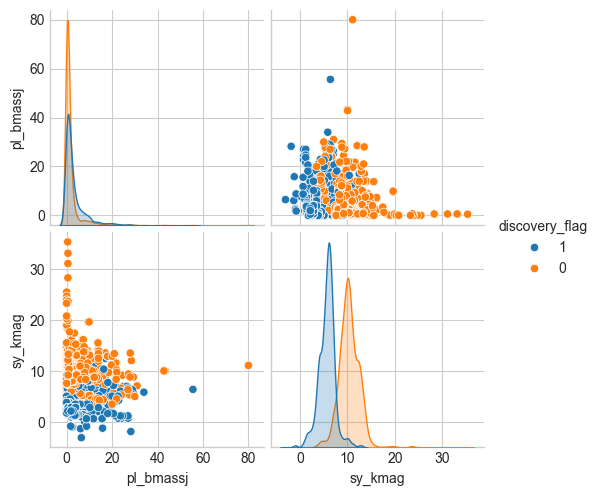

In [30]:
# choosing features for classification

complete_train1 = complete_clean[['pl_bmassj', 'sy_kmag', 'discovery_flag']]
complete_train1.dropna(inplace=True)

sns.pairplot(complete_train1, hue = 'discovery_flag')

In [56]:
# splitting train and test data

X1 = complete_train1.drop('discovery_flag', axis = 1)
y1 = complete_train1['discovery_flag']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30)

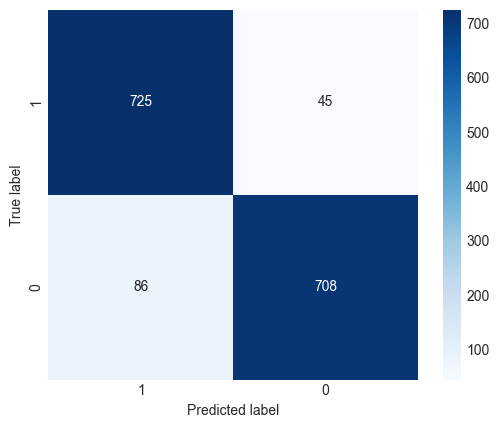

In [57]:
# GaussianNB

## fitting a model

model1 = GaussianNB()
model1.fit(X_train1, y_train1)

## predicting labels
y_pred1 = model1.predict(X_test1)

## results

mat1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=[1,0], yticklabels=[1,0])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()